**BIKE SHARING ANALYSIS(linear regression model)**

1. Reading and understanding the data

In [11]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

#Reading the data
bike=pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [13]:
# Data cleaning
bike.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [14]:
# dropping unnecessary columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [16]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [17]:
bike.shape

(730, 12)

In [18]:
#checking correletion

bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [19]:
#since there's high correlation between temp and atemp, we can drop the column 'atemp'
bike.drop('atemp',axis=1,inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [20]:
# Modifying the data as per the given data dictionary

bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['weathersit'] = bike['weathersit'].map({1:'clear', 2:'mist', 3:'light rain', 4:'heavy rain'})
bike['mnth'] = bike['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
bike['weekday'] = bike['weekday'].map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


In [21]:
# Data visualization

bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

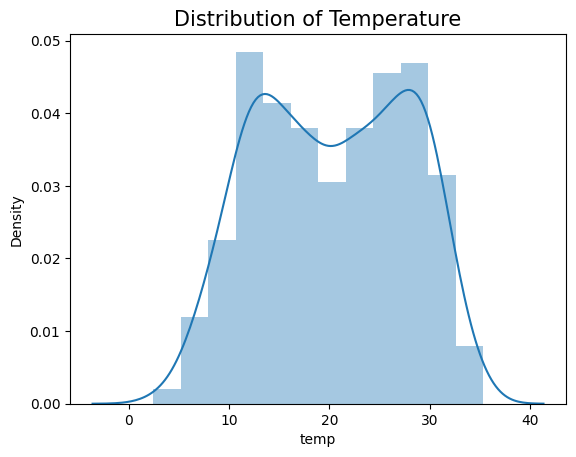

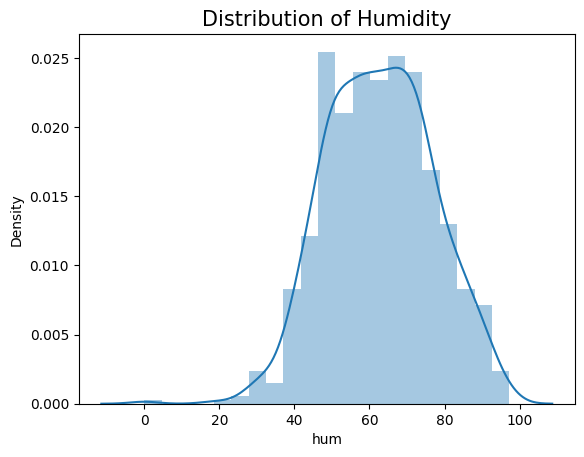

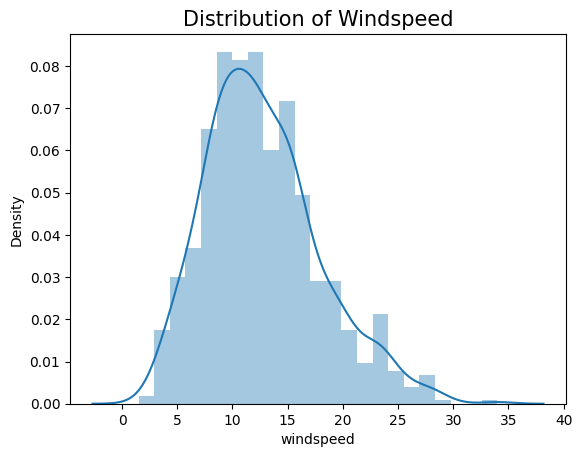

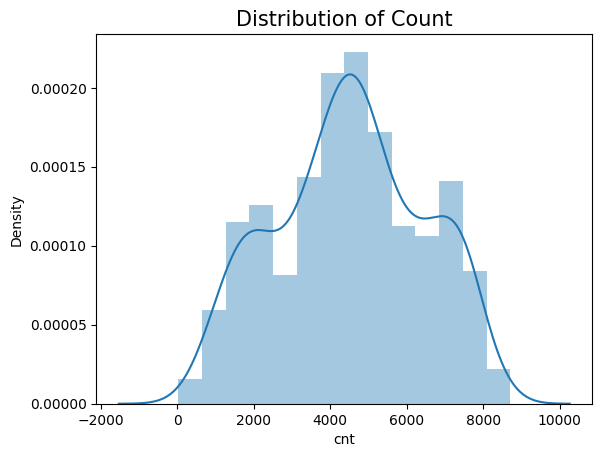

In [22]:
num_data = bike[['temp', 'hum', 'windspeed', 'cnt']]
sns.distplot(bike['temp'])
plt.title(('Distribution of Temperature'), fontsize=15)
plt.show()

sns.distplot(bike['hum'])
plt.title(('Distribution of Humidity'), fontsize=15)
plt.show()

sns.distplot(bike['windspeed'])
plt.title(('Distribution of Windspeed'), fontsize=15)
plt.show()

sns.distplot(bike['cnt'])
plt.title(('Distribution of Count'), fontsize=15)
plt.show()

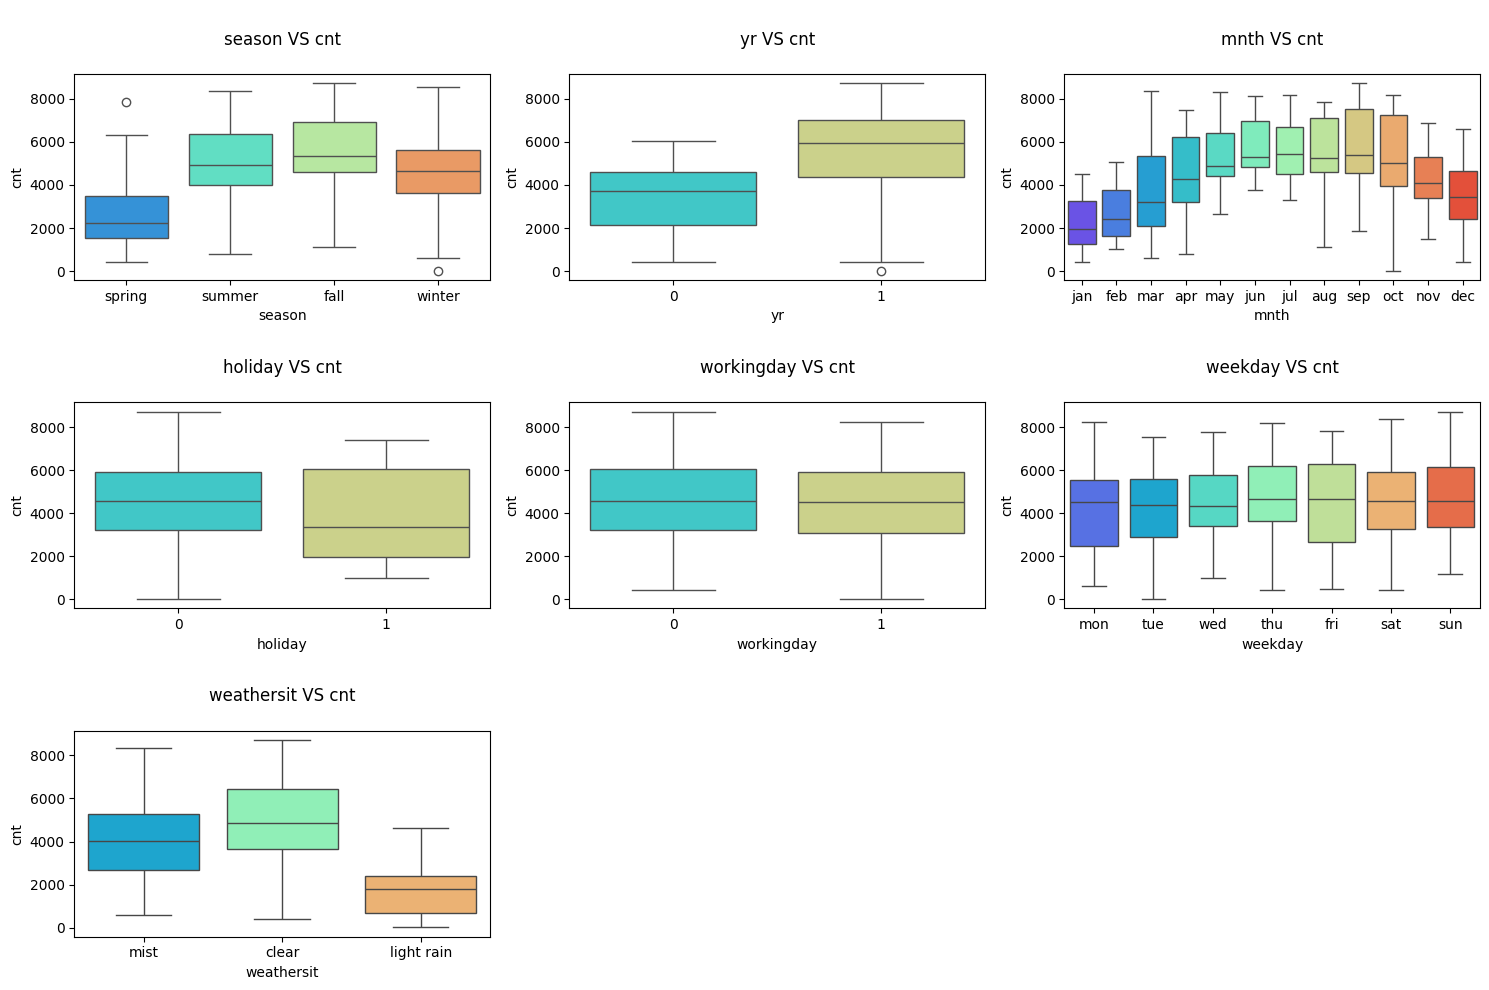

In [23]:
cat_data = bike[['season', 'yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']]
plt.figure(figsize=(15,10))
for i, j in enumerate(cat_data.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=bike[j], y=bike['cnt'], data = bike, palette = 'rainbow')
    plt.title(("\n"+j+" VS cnt\n"))
plt.tight_layout()
plt.show()

In [24]:
# As we saw in the boxplot, 'spring has outlier. so we can drop this column
bike.drop(bike[(bike.season == "spring") & (bike.cnt > 7000)].index, inplace=True)

bike.shape

(729, 11)

<Figure size 1500x1000 with 0 Axes>

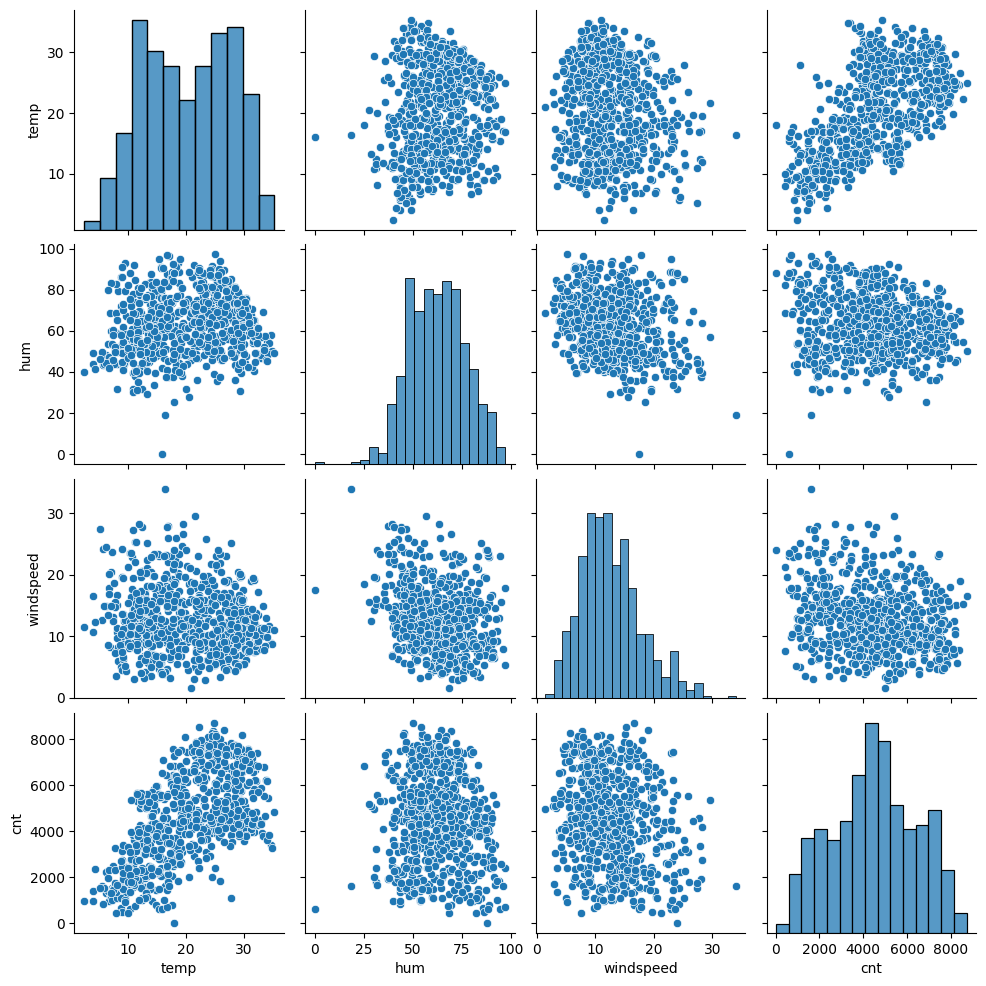

In [25]:
#Bivariate analysis
plt.figure(figsize=(15,10))
sns.pairplot(bike[num_data.columns])
plt.show()

In [26]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


In [27]:
#creating dummy variables
categorical_features = bike.select_dtypes(include=['object']).columns.tolist()
bike = pd.get_dummies(data= bike, columns= categorical_features, drop_first=True)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light rain,weathersit_mist
0,0,0,1,14.110847,80.5833,10.749882,985,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,0,0,1,14.902598,69.6087,16.652113,801,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,0,0,1,8.050924,43.7273,16.636703,1349,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
# splitting data

X = bike
y = bike.pop('cnt')
#train test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light rain,weathersit_mist
0,0,0,1,14.110847,80.5833,10.749882,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,0,0,1,14.902598,69.6087,16.652113,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,0,0,1,8.050924,43.7273,16.636703,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
X_train.shape, X_test.shape

((510, 28), (219, 28))

In [30]:
#rescaling the features
num_var = ['temp', 'hum', 'windspeed']
scaler = MinMaxScaler()
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.describe

<bound method NDFrame.describe of      yr  holiday  workingday  ...  weekday_wed  weathersit_light rain  weathersit_mist
683   1        0           1  ...        False                  False             True
645   1        1           0  ...        False                  False             True
163   0        0           1  ...         True                  False            False
360   0        0           1  ...        False                  False             True
640   1        0           1  ...        False                  False             True
..   ..      ...         ...  ...          ...                    ...              ...
71    0        0           1  ...        False                  False            False
106   0        0           1  ...        False                  False            False
270   0        0           1  ...        False                  False             True
435   1        0           1  ...        False                  False            False
102   0        0           1  ...        False                  False             True

[510 rows x 28 columns]>

In [31]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light rain,weathersit_mist
683,1,0,1,0.327133,0.639330,0.327101,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
645,1,1,0,0.403972,0.731215,0.419004,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True
163,0,0,1,0.717562,0.509660,0.708724,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
360,0,0,1,0.331287,0.785745,0.415925,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
640,1,0,1,0.745598,0.817947,0.110593,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True


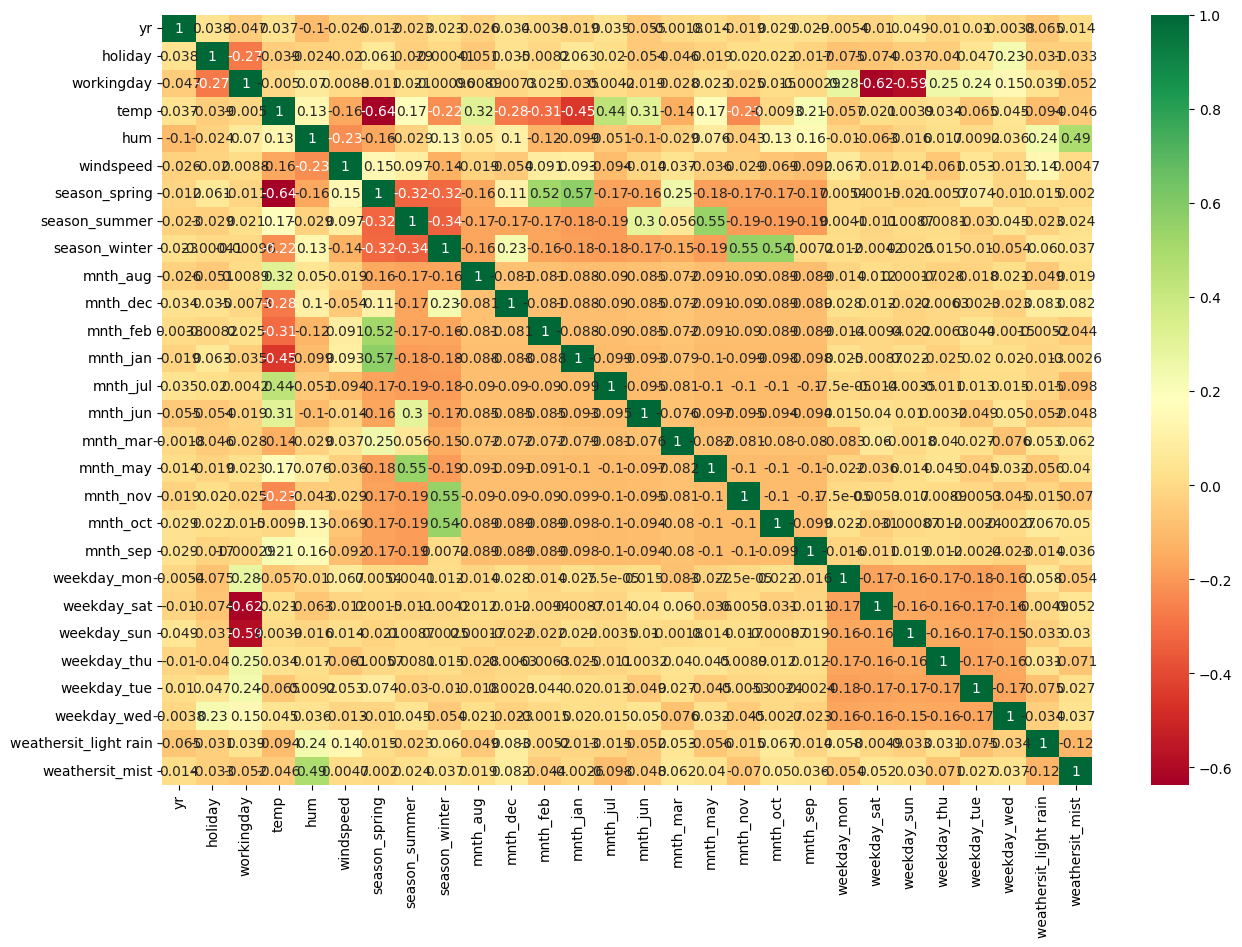

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True, cmap= 'RdYlGn')
plt.show()

In [33]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [39]:
num_var = ['temp', 'hum', 'windspeed']
scaler = MinMaxScaler()
X_test[num_var] = scaler.fit_transform(X_test[num_var])
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0).astype(float)
print(X_train.dtypes)


yr                       float64
holiday                  float64
workingday               float64
temp                     float64
hum                      float64
windspeed                float64
season_spring            float64
season_summer            float64
season_winter            float64
mnth_aug                 float64
mnth_dec                 float64
mnth_feb                 float64
mnth_jan                 float64
mnth_jul                 float64
mnth_jun                 float64
mnth_mar                 float64
mnth_may                 float64
mnth_nov                 float64
mnth_oct                 float64
mnth_sep                 float64
weekday_mon              float64
weekday_sat              float64
weekday_sun              float64
weekday_thu              float64
weekday_tue              float64
weekday_wed              float64
weathersit_light rain    float64
weathersit_mist          float64
dtype: object


In [40]:
# 1st MODEL
X_train_sm = sm.add_constant(X_train)
linear_reg_1 = sm.OLS(y_train, X_train_sm).fit()
linear_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.86
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.03e-180
Time:                        14:09:30   Log-Likelihood:                -4099.2
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     481   BIC:                             8379.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3652.3967    925.315      3.947      0.000    1834.238    5470.556
yr                     2009.9239     70.265     28.605      0.000    1871.859    2147.989
holiday                -605.5677    788.894     -0.768      0.443   -2155.672     944.536
workingday             -110.5187    818.501     -0.135      0.893   -1718.798    1497.761
temp                   3347.4406    400.877      8.350      0.000    2559.754    4135.128
hum                   -1365.9153    335.423     -4.072      0.000   -2024.991    -706.840
windspeed             -1001.4380    204.249     -4.903      0.000   -1402.768    -600.108
season_spring         -1233.5383    269.826     -4.572      0.000   -1763.722    -703.354
season_summer           -25.4714    227.582     -0.112      0.911    -472.648     421.706
season_winter           617.6326    227.577      2.714      0.007     170.465    1064.800
mnth_aug               -122.4360    297.787     -0.411      0.681    -707.560     462.688
mnth_dec               -546.0293    304.456     -1.793      0.074   -1144.257      52.198
mnth_feb               -122.6782    309.389     -0.397      0.692    -730.599     485.242
mnth_jan               -258.5906    315.248     -0.820      0.412    -878.024     360.843
mnth_jul               -413.9465    301.402     -1.373      0.170   -1006.174     178.281
mnth_jun                102.5528    209.188      0.490      0.624    -308.482     513.587
mnth_mar                165.8372    246.170      0.674      0.501    -317.865     649.539
mnth_may                341.5993    174.696      1.955      0.051      -1.662     684.861
mnth_nov               -615.1878    321.286     -1.915      0.056   -1246.484      16.109
mnth_oct                169.5757    315.480      0.538      0.591    -450.313     789.464
mnth_sep                475.4884    277.802      1.712      0.088     -70.366    1021.343
weekday_mon            -368.8642    127.515     -2.893      0.004    -619.419    -118.309
weekday_sat            -120.3217    826.839     -0.146      0.884   -1744.984    1504.341
weekday_sun             -55.3302    815.982     -0.068      0.946   -1658.660    1548.000
weekday_thu             -17.3950    127.945     -0.136      0.892    -268.796     234.006
weekday_tue            -178.3490    126.280     -1.412      0.158    -426.477      69.779
weekday_wed            -207.9044    132.934     -1.564      0.118    -469.107      53.299
weathersit_light rain -1852.8522    232.796     -7.959      0.000   -2310.274   -1395.430
weathersit_mist        -480.3850     92.080     -5.217      0.000    -661.314    -299.456
==============================================================================
Omnibus:                       90.816   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarqu

In [50]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
rfe = RFE(linear_reg, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [57]:
list(zip(X_train.columns, rfe.ranking_, rfe.support_))

[('yr', 1, True),
 ('holiday', 2, False),
 ('workingday', 16, False),
 ('temp', 1, True),
 ('hum', 1, True),
 ('windspeed', 1, True),
 ('season_spring', 1, True),
 ('season_summer', 18, False),
 ('season_winter', 1, True),
 ('mnth_aug', 14, False),
 ('mnth_dec', 1, True),
 ('mnth_feb', 13, False),
 ('mnth_jan', 12, False),
 ('mnth_jul', 1, True),
 ('mnth_jun', 11, False),
 ('mnth_mar', 7, False),
 ('mnth_may', 5, False),
 ('mnth_nov', 1, True),
 ('mnth_oct', 8, False),
 ('mnth_sep', 4, False),
 ('weekday_mon', 6, False),
 ('weekday_sat', 15, False),
 ('weekday_sun', 17, False),
 ('weekday_thu', 19, False),
 ('weekday_tue', 10, False),
 ('weekday_wed', 9, False),
 ('weathersit_light rain', 1, True),
 ('weathersit_mist', 3, False)]

In [52]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_jul', 'mnth_nov', 'weathersit_light rain'],
      dtype='object')

In [53]:
X_train_rfe = X_train[cols]
X_train_rfe.head()

,yr,temp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_jul,mnth_nov,weathersit_light rain
683,1.0,0.327133,0.639330,0.327101,0.0,1.0,0.0,0.0,1.0,0.0
645,1.0,0.403972,0.731215,0.419004,0.0,1.0,0.0,0.0,0.0,0.0
163,0.0,0.717562,0.509660,0.708724,0.0,0.0,0.0,0.0,0.0,0.0
360,0.0,0.331287,0.785745,0.415925,1.0,0.0,1.0,0.0,0.0,0.0
640,1.0,0.745598,0.817947,0.110593,0.0,1.0,0.0,0.0,0.0,0.0


In [54]:
X_train_ml = sm.add_constant(X_train_rfe)
linear_reg_ml = sm.OLS(y_train, X_train_ml).fit()
linear_reg_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.7
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.34e-185
Time:                        14:48:26   Log-Likelihood:                -4134.8
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     499   BIC:                             8338.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3774.9118    293.078     12.880      0.000    3199.094    4350.730
yr                     1989.0994     72.790     27.327      0.000    1846.087    2132.112
temp                   3879.6550    291.456     13.311      0.000    3307.022    4452.288
hum                   -2281.0428    277.254     -8.227      0.000   -2825.772   -1736.313
windspeed             -1301.1595    207.452     -6.272      0.000   -1708.746    -893.573
season_spring         -1331.7753    143.038     -9.311      0.000   -1612.806   -1050.745
season_winter           712.6191    122.524      5.816      0.000     471.893     953.345
mnth_dec               -609.2415    154.058     -3.955      0.000    -911.924    -306.559
mnth_jul               -644.5766    142.151     -4.534      0.000    -923.865    -365.289
mnth_nov               -676.8819    162.072     -4.176      0.000    -995.310    -358.454
weathersit_light rain -1395.8471    226.522     -6.162      0.000   -1840.902    -950.793
==============================================================================
Omnibus:                       79.416   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.631
Skew:                          -0.852   Prob(JB):                     3.98e-37
Kurtosis:                       5.232   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# the model explains 83.1% of the variance in bike demand, hence the chosen features are significantpredictors

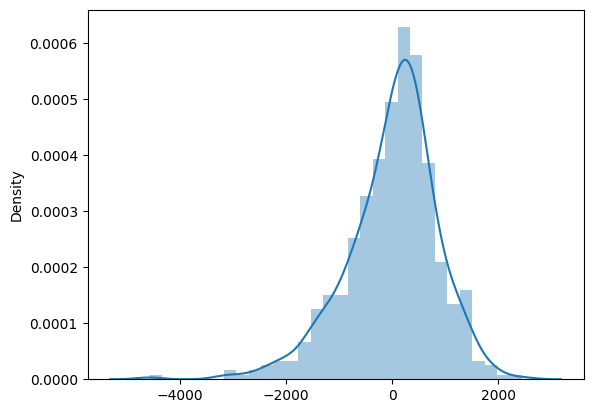

In [58]:
# Residual Analysis
y_train_pred = linear_reg_ml.predict(X_train_ml)
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

In [ ]:
# here, residuals are normally distributed and are symmetrically centered around 0.


In [59]:
# prediction on the test set
vars = X_train_rfe.columns
vars

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_dec',
       'mnth_jul', 'mnth_nov', 'weathersit_light rain'],
      dtype='object')

In [60]:
X_test = X_test[vars]
X_test.head()

,yr,temp,windspeed,season_spring,season_winter,mnth_dec,mnth_jul,mnth_nov,weathersit_light rain
469,1,0.687336,0.387313,False,False,False,False,False,False
148,0,0.769438,0.363028,False,False,False,False,False,False
302,0,0.299316,0.282038,False,True,False,False,False,False
355,0,0.439902,0.001356,True,False,True,False,False,False
516,1,0.751443,0.414296,False,False,False,False,False,False


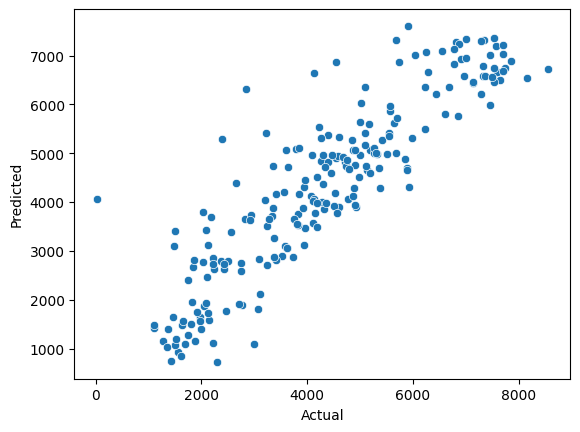

In [63]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = linear_reg_ml.predict(X_test_sm)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [64]:
# Model Evaluation
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_train, r2_test

(0.808314865134204, 0.7783377659278068)

In [ ]:
#The top three predictor variables that influence bookings of bike are year, temperature and windspeed.